Import Dependencies

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle




Inspection of Data

In [24]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [25]:
df.shape

(7043, 21)

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
## Dropping customerID column as it is not useful for prediction
df = df.drop(columns='customerID')

In [29]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [30]:
## Unique values in each column

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numerical_cols:
        print(col, df[col].unique())  
        print(" " * 50)
    

gender ['Female' 'Male']
                                                  
SeniorCitizen [0 1]
                                                  
Partner ['Yes' 'No']
                                                  
Dependents ['No' 'Yes']
                                                  
PhoneService ['No' 'Yes']
                                                  
MultipleLines ['No phone service' 'No' 'Yes']
                                                  
InternetService ['DSL' 'Fiber optic' 'No']
                                                  
OnlineSecurity ['No' 'Yes' 'No internet service']
                                                  
OnlineBackup ['Yes' 'No' 'No internet service']
                                                  
DeviceProtection ['No' 'Yes' 'No internet service']
                                                  
TechSupport ['No' 'Yes' 'No internet service']
                                                  
StreamingTV ['No' 'Yes' 'No internet 

In [33]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
## Changing column type of TotalCharges to float
len(df[df['TotalCharges'] == ' '])

11

In [35]:
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})

In [36]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Exploratory Data Analysis (EDA)

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
## Distribution of Numerical features
def plot_histogram(df, column):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')
    
    col_mean = df[column].mean()
    col_median = df[column].median()
    
    plt.axvline(x=col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(x=col_median, color='green', linestyle='-', label='Median')
    
    plt.legend()
    plt.show()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


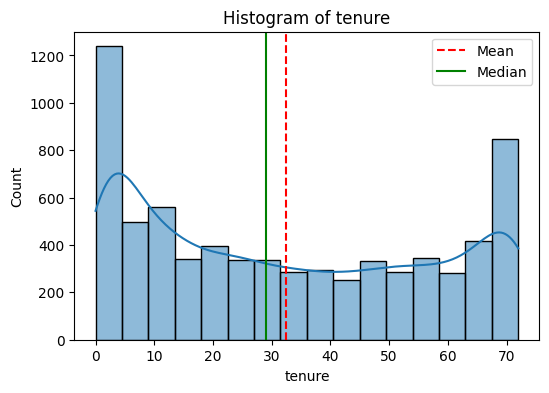

In [40]:
plot_histogram(df, 'tenure')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


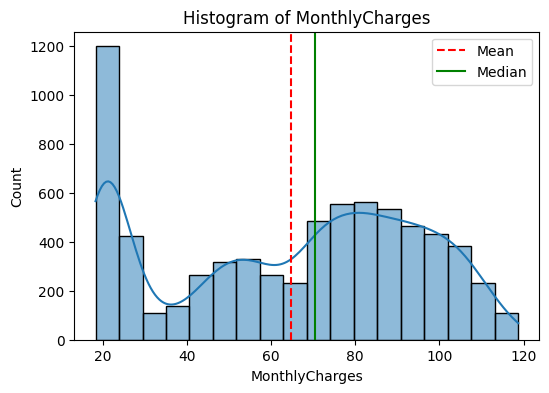

In [42]:
plot_histogram(df, 'MonthlyCharges')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


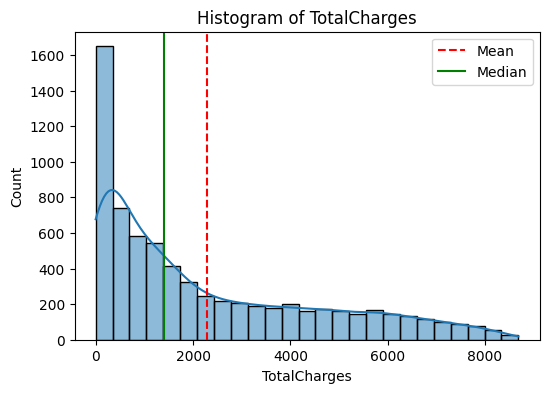

In [43]:
plot_histogram(df, 'TotalCharges')

In [48]:
## Box Plot for numerical features:
def box_plot(df,column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y = df[column_name])
    plt.title(f'Boxplot of {column_name}')
    
    plt.ylabel(column_name)
    plt.show()

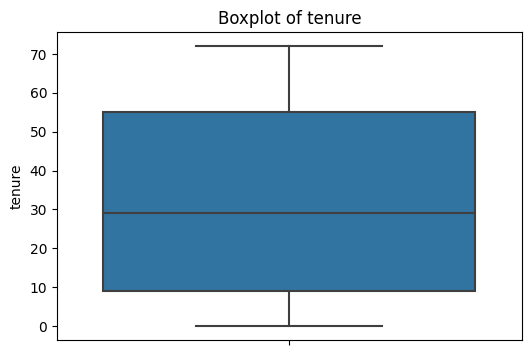

In [49]:
box_plot(df , 'tenure')

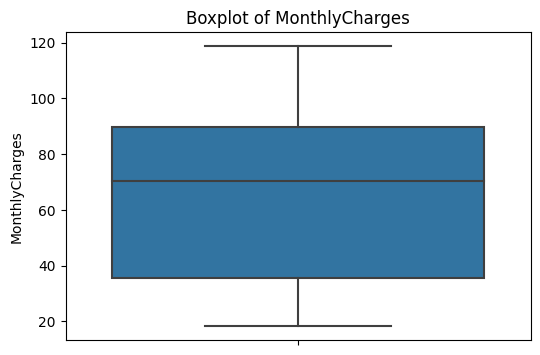

In [50]:
box_plot(df , 'MonthlyCharges')

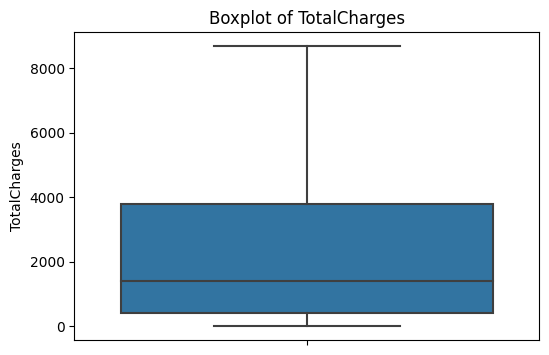

In [51]:
box_plot(df , 'TotalCharges')

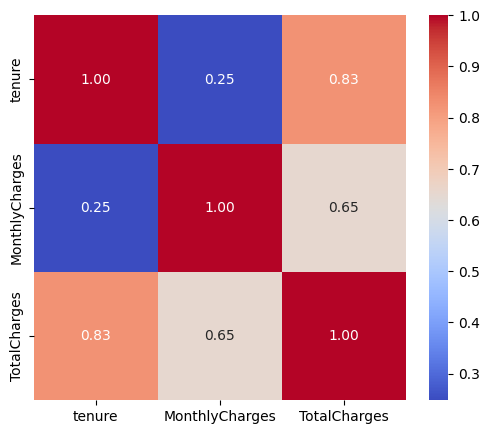

In [57]:
## Corelation between numerical features    
plt.figure(figsize=(6, 5))

sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.show
plt.savefig("Corr_between_numerical_columns.png")